In [1]:
import sys
import pathlib

root = str(pathlib.Path().cwd().parent)
if root not in sys.path:
    sys.path.append(root)

In [2]:
import io
import math
import os
import random

import atproto
import dotenv
import numpy as np

from generators import RGBGenerator, HSVGenerator, CIELChGenerator
from generators.palettes import (
    GradientPalette,
    SinglePalette,
    RandomPalette,
    ComplementaryPalette,
    AnalogousPalette,
    TriadicPalette
)
from layers.frames import SingleFrame, HorizontalFrame, VerticalFrame, TwoByTwoFrame

dotenv.load_dotenv()

True

In [3]:
USERNAME = os.getenv('ATPROTO_CLIENT_USERNAME')
PASSWORD = os.getenv('ATPROTO_CLIENT_PASSWORD')

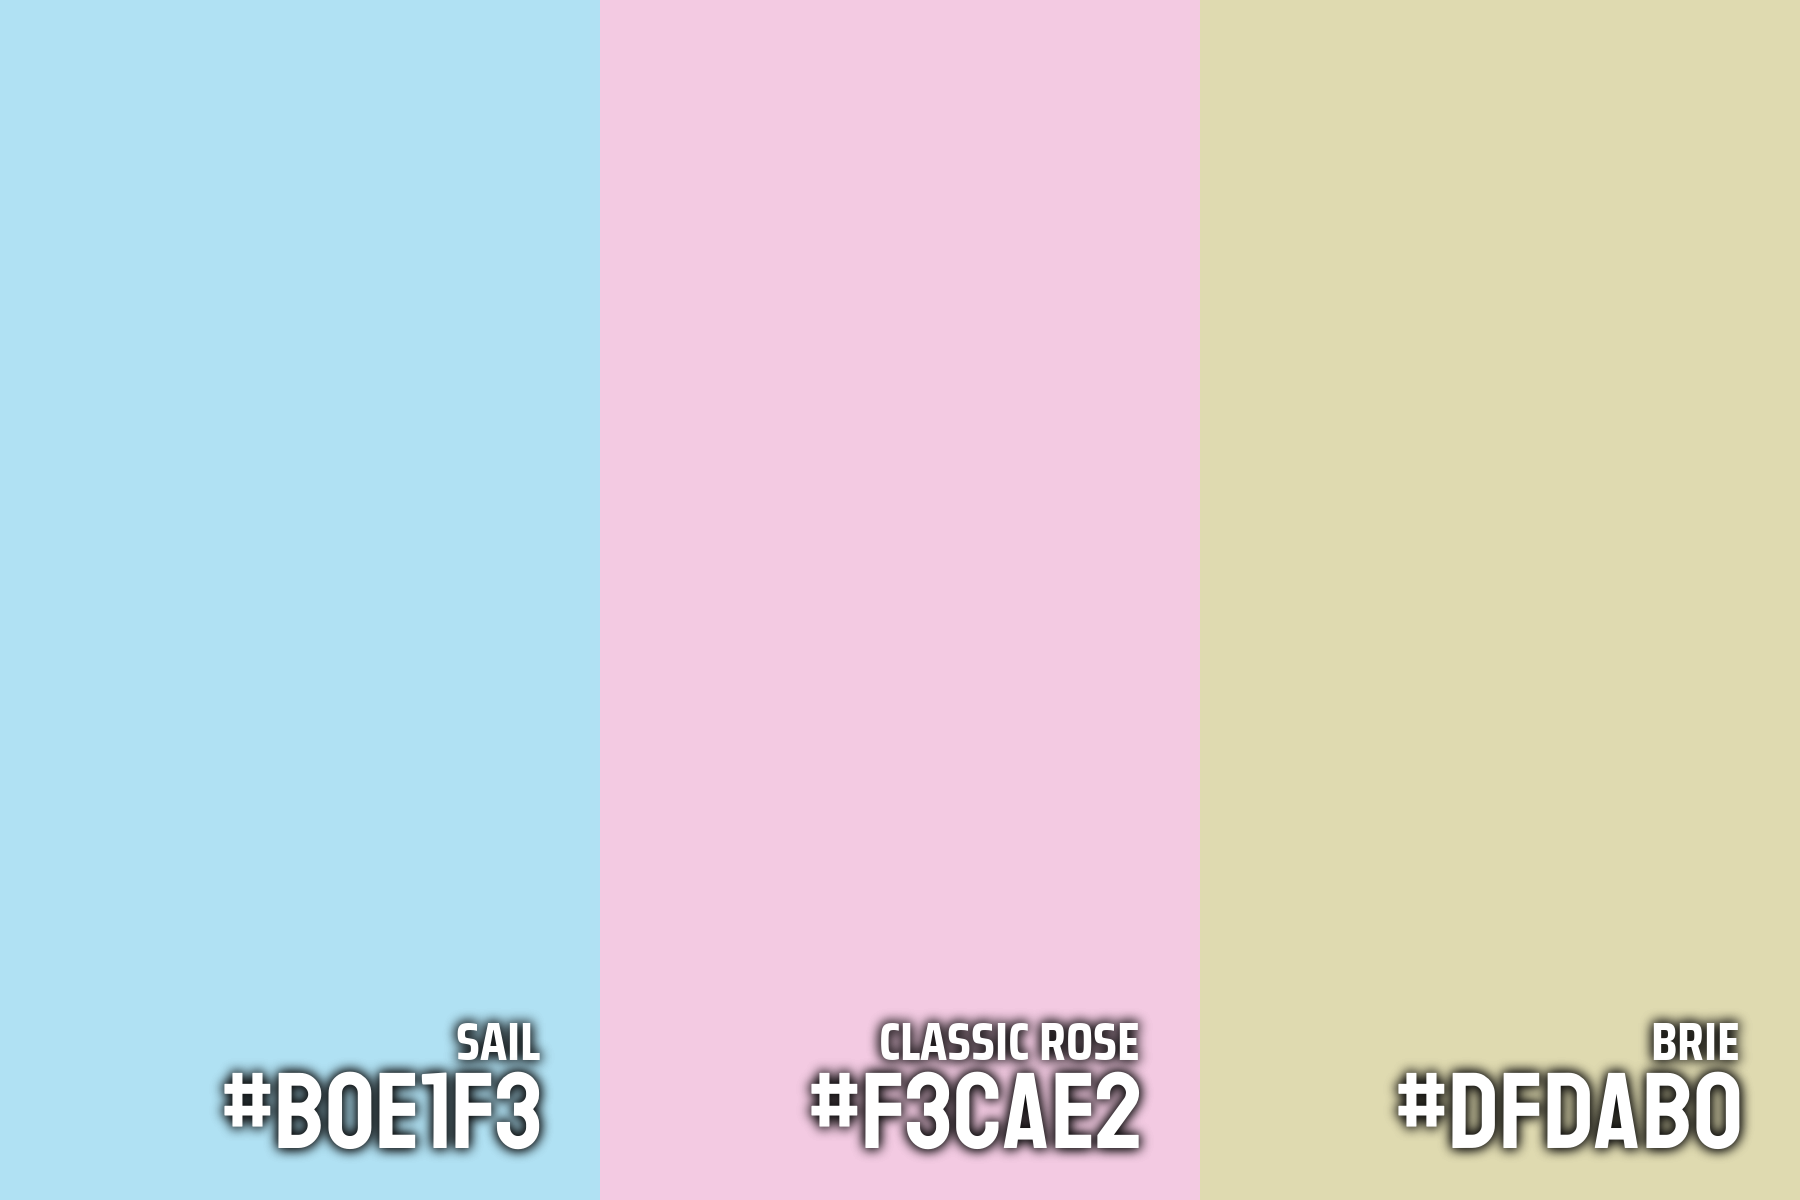

In [15]:
generator = CIELChGenerator()
palette = TriadicPalette(generator)
image = HorizontalFrame((600, 1200)).construct_frame(palette.generate(3))
image

In [ ]:
generator = CIELChGenerator()
options = {
    1: {
        'frames': [SingleFrame((1200, 1200))],
        'palettes': [RandomPalette]
    },
    2: {
        'frames': [HorizontalFrame((600, 1200)), VerticalFrame((600, 1200))],
        'palettes': [RandomPalette, ComplementaryPalette]
    },
    3: {
        'frames': [HorizontalFrame((600, 1200)), VerticalFrame((600, 1200))],
        'palettes': [RandomPalette, GradientPalette, AnalogousPalette, TriadicPalette]
    },
    4: {
        'frames': [HorizontalFrame((600, 1200)), VerticalFrame((600, 1200)), TwoByTwoFrame((600, 600))],
        'palettes': [RandomPalette, GradientPalette]
    },
}

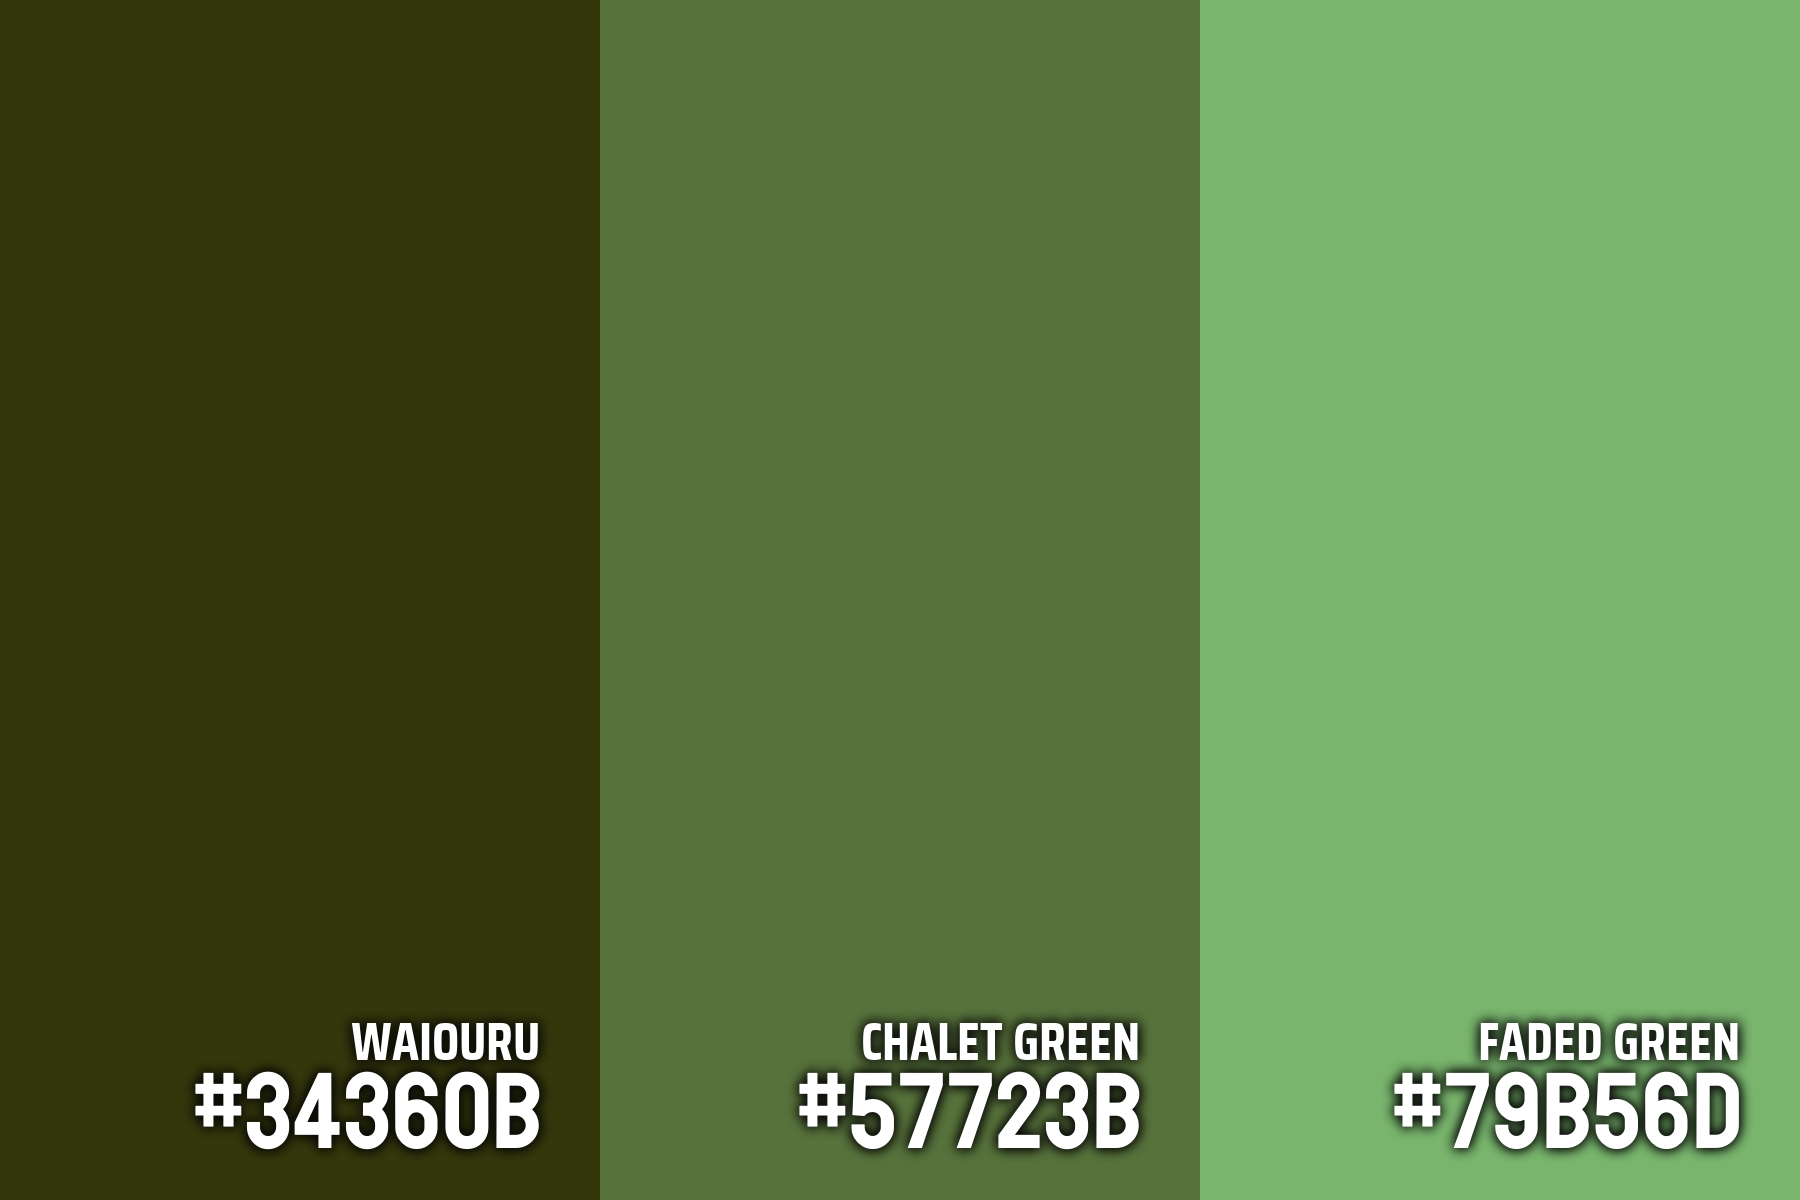

In [5]:
n = np.random.choice(
    [1, 2, 3, 4],
    p=[0.25, 0.25, 0.25, 0.25]
)
frame, palette = random.choice(options[n])
image = frame.construct_frame(palette(generator).generate(n))
image

In [6]:
buffer = io.BytesIO()
image.save(buffer, format="PNG")

In [7]:
# client = atproto.Client()
# client.login(USERNAME, PASSWORD)

# client.send_image("TEST POST", image=buffer.getvalue(), image_alt = f"A picture of the color '{colour.name}'. In the centre of the image is the name and hex code of the color ({colour.hexcode})")